In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
import json
import requests
from bs4 import BeautifulSoup
import json
import requests
from bs4 import BeautifulSoup
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("Dataset") if isfile(join("Dataset", f))]
import re
import operator

from collections import Counter

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
import nltk
from nltk.tokenize import word_tokenize

%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

import pattern
from pattern.en import sentiment
from pattern.en import mood
from textblob import TextBlob

from pattern.en import modality

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
def get_json_from_page(url):
    res = requests.get(url)
    html_page = res.content

    soup = BeautifulSoup(html_page, "lxml")

    dictionary = json.loads(res.content)
    return dictionary

def get_all_tweets_url(dictionary):
    url_tweets = []
    for tweet_data in dictionary['posts']['twitter']:
        url = "https://www.twitter.com/" + tweet_data['author']['tweeter_id'] + "/status/" + tweet_data['tweet_id']
        url_tweets.append(url)
#     print(url_tweets)
    return url_tweets

def get_thread(url):
    headers = {'User-Agent': 'Nokia5310XpressMusic_CMCC/2.0 (10.10) Profile/MIDP-2.1 Configuration/CLDC-1.1 UCWEB/2.0 (Java; U; MIDP-2.0; en-US; Nokia5310XpressMusic) U2/1.0.0 UCBrowser/9.5.0.449 U2/1.0.0 Mobile'}

    res = requests.get(url, headers=headers)
    html_page = res.content
    
    soup = BeautifulSoup(html_page, 'html.parser')

    items = soup.findAll('div', {'class': 'tweet-text'})

    all_text = ""
    for item in items:
        all_text += item.getText() + "\n\n"
    return all_text

def get_json_from_page(url):
    res = requests.get(url)
    html_page = res.content

    soup = BeautifulSoup(html_page, "lxml")

    dictionary = json.loads(res.content)
    return dictionary

def get_all_news(dictionary):
    url_news = []
    for news in dictionary['posts']['news']:
        if news['name'] == 'yahoo':
            url = news['url']
            print(dictionary['doi'])
            url_news.append(url)
        if news['name'] == 'YAHOO':
            url = news['url']
            url_news.append(url)
#     print(url_tweets)
    return url_news

def extract_words_from_text(text):
    text = text.replace(".", "")
    text = text.replace("\n", " ")
    text = text.replace("(", " ")
    text = text.replace(")", " ")
    text = text.replace(",", "")
    all_words = text.split(" ")
    all_words = [word.lower() for word in all_words]
    for i in range(len(all_words)):
        if all_words[i] == " " or all_words[i] == "":
            all_words.pop(i)
    print(all_words)
    return all_words

#Given a list of words, this function creates a dictionary using words as keys 
#and their number of appearances as the corresponding values
def create_word_count_dict(word_list):
    word_counter = {"total_number_of_words": 0}
    for word in word_list:
        if word in word_counter:
            word_counter[word] += 1
        elif word not in word_counter:
            word_counter[word] = 1
        word_counter["total_number_of_words"] += 1
    return word_counter

#Creates a word probability dictionary from a word counter dictionary
def create_word_prob_dict(word_count_dict):
    for key in word_count_dict:
        if key is not "total_number_of_words":
            word_count_dict[key] = float(word_count_dict[key] / word_count_dict["total_number_of_words"])
    sorted_x = sorted(word_count_dict.items(), key=operator.itemgetter(1))
    return sorted_x

# Python program to convert a list to string  
def listToString(s):  
    str1 = ""    
    for ele in s:  
        str1 += ele   
    return str1  
          


In [3]:
all_yahoo = ['https://api.altmetric.com/v1/fetch/doi/10.2139/ssrn.3561244?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1186/s13578-020-00404-4?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.11.20031096?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41591-020-0819-2?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.23.20076042?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30753-4?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2001899?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.kint.2020.03.001?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.meegid.2020.104351?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.7326/m20-1176?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.2807/1560-7917.es.2020.25.5.2000080?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1136/bmj.m1728?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/d41586-020-00741-x?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1164/rccm.202003-0817le?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s2352-4642(20)30105-x?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41591-020-0822-7?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.01.20049528?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.02.20051318?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.09.20033217?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1136/bmj.m1328?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30360-3?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1093/nsr/nwaa036?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.01.24.919159?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.6775?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30817-5?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30460-8?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41574-020-0353-9?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmoa2001282?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.05.20031815?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.ajogmf.2020.100106?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.2648?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3390/nu12040988?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41587-020-0513-4?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1093/jtm/taaa020?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.3864?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.16.20037168?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3390/jcm9020538?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30566-3?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.ijid.2020.03.020?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.30.015347?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jaut.2020.102433?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1148/radiol.2020200343?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1002/uog.22006?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.13.990226?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30183-5?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/d41586-020-00740-y?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1126/science.abb7015?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2001468?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30418-9?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.6019?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.2214/ajr.20.22975?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.15585/mmwr.mm6913e2?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.15585/mmwr.mm6908e1?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3201/eid1310.070576?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1002/jmv.25725?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jamaneurol.2020.1127?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/d41586-020-00927-3?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.redox.2020.101508?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30567-5?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1126/science.abb6936?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.01.021196?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1128/jvi.00127-20?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.4783?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41591-020-0820-9?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2009316?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1542/peds.2020-0702?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.4756?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.01.23.916395?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1126/science.abb7566?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3201/eid2606.200320?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.ijantimicag.2020.105949?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmp2002106?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.2565?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.2807/1560-7917.es.2020.25.10.2000180?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jcv.2020.104372?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1111/j.1423-0410.2004.00577.x?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jamainternmed.2020.1764?key=bfc9115e2490100d074ded6a3a2cb845']

In [4]:
#select different API url
API_url = all_yahoo[4]
print(API_url)

https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.23.20076042?key=bfc9115e2490100d074ded6a3a2cb845


In [5]:
dictionary = get_json_from_page(API_url)
doi = dictionary['citation']['doi']
print(doi)

10.1101/2020.04.23.20076042


In [6]:
#get tweets
tweets = []
dictionary = get_json_from_page(API_url)
url_tweets = get_all_tweets_url(dictionary)
for url_tweet in url_tweets:
                    twitter_message = get_thread(url_tweet)
                    tweets.append(twitter_message)

print(tweets)

['\n  Features of 16,749 hospitalised UK patients with COVID-19 using the ISARIC WHO Clinical Characterisation Protocol  medrxiv.org/cgi/content/sh… #medRxiv\n\n\n\n', '\n  First major data on #COVID19 from the CCP-UK study @CCPUKstudy : medrxiv.org/content/10.110…\n\n\n\n\n  The work of many many people!!\n\n\n\n', '\n  First major data on #COVID19 from the CCP-UK study @CCPUKstudy : medrxiv.org/content/10.110…\n\n\n\n', '\n  Features of 16,749 hospitalised UK patients with COVID-19 using the ISARIC WHO Clinical Characterisation Protocol  medrxiv.org/content/10.110…\n\n\n\n', '\n  Data from >16,000 hospitalized COVID patients in UK. N=497 (3%) vented of which 53% died; 27% ongoing care. \n\nmedrxiv.org/content/10.110… pic.twitter.com/pykcU93THH\n\n\n\n', '\n  Data from >16,000 hospitalized COVID patients in UK. N=497 (3%) vented of which 53% died; 27% ongoing care. \n\nmedrxiv.org/content/10.110… pic.twitter.com/pykcU93THH\n\n\n\n', '\n  Features of 16,749 hospitalised UK patients wit

In [7]:
tweets = listToString(tweets)

In [8]:
total_number_of_tweets = len(tweets)
countern = 1

from textblob import TextBlob
tb = TextBlob(tweets)
tweets_sentences = tb.sentences

print(tweets_sentences)

[Sentence("
  Features of 16,749 hospitalised UK patients with COVID-19 using the ISARIC WHO Clinical Characterisation Protocol  medrxiv.org/cgi/content/sh… #medRxiv




  First major data on #COVID19 from the CCP-UK study @CCPUKstudy : medrxiv.org/content/10.110…




  The work of many many people!!"), Sentence("First major data on #COVID19 from the CCP-UK study @CCPUKstudy : medrxiv.org/content/10.110…




  Features of 16,749 hospitalised UK patients with COVID-19 using the ISARIC WHO Clinical Characterisation Protocol  medrxiv.org/content/10.110…




  Data from >16,000 hospitalized COVID patients in UK."), Sentence("N=497 (3%) vented of which 53% died; 27% ongoing care."), Sentence("medrxiv.org/content/10.110… pic.twitter.com/pykcU93THH




  Data from >16,000 hospitalized COVID patients in UK."), Sentence("N=497 (3%) vented of which 53% died; 27% ongoing care."), Sentence("medrxiv.org/content/10.110… pic.twitter.com/pykcU93THH




  Features of 16,749 hospitalised UK patients wit

In [10]:
total_number_of_tweets = len(tweets)
countern = 1
for i in range(1):
    word_list_tweet = re.sub("[^\w]", " ",  tweets).split()
print(word_list_tweet)

['Features', 'of', '16', '749', 'hospitalised', 'UK', 'patients', 'with', 'COVID', '19', 'using', 'the', 'ISARIC', 'WHO', 'Clinical', 'Characterisation', 'Protocol', 'medrxiv', 'org', 'cgi', 'content', 'sh', 'medRxiv', 'First', 'major', 'data', 'on', 'COVID19', 'from', 'the', 'CCP', 'UK', 'study', 'CCPUKstudy', 'medrxiv', 'org', 'content', '10', '110', 'The', 'work', 'of', 'many', 'many', 'people', 'First', 'major', 'data', 'on', 'COVID19', 'from', 'the', 'CCP', 'UK', 'study', 'CCPUKstudy', 'medrxiv', 'org', 'content', '10', '110', 'Features', 'of', '16', '749', 'hospitalised', 'UK', 'patients', 'with', 'COVID', '19', 'using', 'the', 'ISARIC', 'WHO', 'Clinical', 'Characterisation', 'Protocol', 'medrxiv', 'org', 'content', '10', '110', 'Data', 'from', '16', '000', 'hospitalized', 'COVID', 'patients', 'in', 'UK', 'N', '497', '3', 'vented', 'of', 'which', '53', 'died', '27', 'ongoing', 'care', 'medrxiv', 'org', 'content', '10', '110', 'pic', 'twitter', 'com', 'pykcU93THH', 'Data', 'from',

In [11]:
dictionary = get_json_from_page(API_url)
doi = dictionary['citation']['doi']
print(doi)

10.1101/2020.04.23.20076042


In [12]:
dictionary = get_json_from_page(API_url)
#     print(dictionary)
url_news = []
#     print(dictionary['doi'])
for news in dictionary['posts']['news']:
#         print(news)
    if news['author']['name'] == 'Yahoo!':
        url = news['url']
        print(url)
        url_news.append(url)
    if news['author']['name'] == 'yahoo':
        url = news['url']
        print(url)
        url_news.append(url)


http://ct.moreover.com/?a=42034821341&p=1pl&v=1&x=_S17G0mvUJg75Gpa2uf4OA


In [13]:
print(url)

http://ct.moreover.com/?a=42034821341&p=1pl&v=1&x=_S17G0mvUJg75Gpa2uf4OA


In [14]:
# Request
r1 = requests.get(url)
r1.status_code

# We'll save in coverpage the cover page content
coverpage = r1.content

# Soup creation
soup1 = BeautifulSoup(coverpage, 'html.parser')

# News identification
coverpage_news = soup1.find_all('h3', class_='fc-item__title')
len(coverpage_news)

0

In [15]:
print(url)

http://ct.moreover.com/?a=42034821341&p=1pl&v=1&x=_S17G0mvUJg75Gpa2uf4OA


In [16]:
# Empty lists for content, links and titles
news_contents = []
list_titles = []

title = requests.get(url)
title_content = title.content
soup_article = BeautifulSoup(title_content, 'html.parser')
body = soup_article.find_all('header', class_='caas-header') or soup_article.find_all('header', id='SideTop-0-HeadComponentTitle')
y = body[0].find_all('h1')

# Unifying the paragraphs
list_paragraphs = []
for p in np.arange(0, len(y)):
    paragraph = y[p].get_text()
    list_paragraphs.append(paragraph)
    final_title = " ".join(list_paragraphs)
    print('TITLE:',final_title)
list_titles.append(final_title)

# Reading the content (it is divided in paragraphs)
article = requests.get(url)
article_content = article.content
soup_article = BeautifulSoup(article_content, 'html.parser')
body = soup_article.find_all('div', class_='caas-body') or soup_article.find_all('article', itemprop='articleBody')
x = body[0].find_all('p')

# Unifying the paragraphs
list_paragraphs = []
for p in np.arange(0, len(x)):
    paragraph = x[p].get_text()
    list_paragraphs.append(paragraph)
    final_article = " ".join(list_paragraphs)
    print('ARTICLE:', final_article)

news_contents.append(final_article)

TITLE: Coronavirus: Why are obese people more at risk?
ARTICLE: Obesity has been highlighted as one of the biggest risk factors for complications amid the coronavirus outbreak.
ARTICLE: Obesity has been highlighted as one of the biggest risk factors for complications amid the coronavirus outbreak. In the largest study in Europe so far, data from more than 16,000 patients across 166 UK hospitals revealed carrying a dangerous amount of weight, old age and being male all raise the risk of dying with the infection.
ARTICLE: Obesity has been highlighted as one of the biggest risk factors for complications amid the coronavirus outbreak. In the largest study in Europe so far, data from more than 16,000 patients across 166 UK hospitals revealed carrying a dangerous amount of weight, old age and being male all raise the risk of dying with the infection. The US Centers for Disease Control and Prevention reported that out of around 180 adults hospitalised with the coronavirus, 89% had at least on

<BarContainer object of 4 artists>

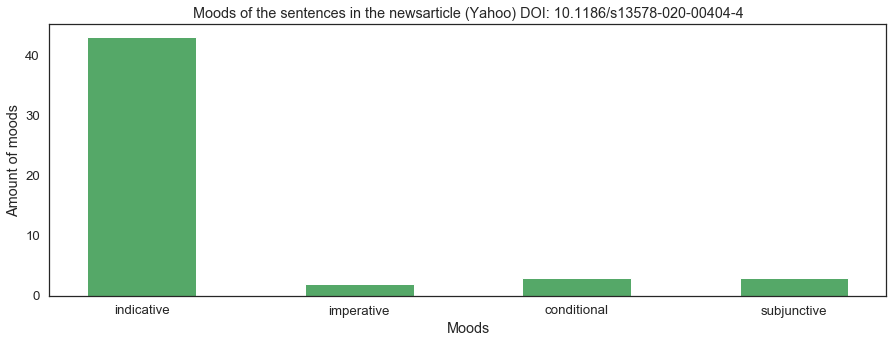

In [21]:
#moods of the sentences in the newsarticle
from textblob import TextBlob
tb = TextBlob(final_article)
sentences = tb.sentences

moods = [mood(str(s)) for s in sentences if len(sentences)>1]

moods = Counter(moods)

plt.figure(figsize=(15,5))
plt.title('Moods of the sentences in the newsarticle (Yahoo) DOI: 10.1186/s13578-020-00404-4')
plt.ylabel('Amount of moods')
plt.xlabel('Moods')
plt.bar(moods.keys(), moods.values(), width=.5, color='g')

Sentences with negative modality:
-0.041666666666666664 Obese people may also have reduced lung function, making it harder to draw in oxygen.
Sentences with negative modality:
-0.25 Speaking on BBC Sounds, he specifically blamed ultra-processed food, which reportedly makes up around half of the average person’s daily calorie intake.


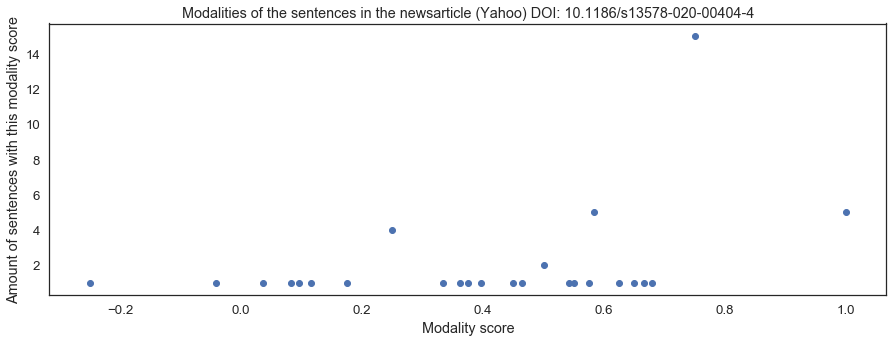

In [20]:
#MODALITY of the sentences in the newsarticle
from pattern.en import modality
modalities = [modality(str(s)) for s in sentences if len(s.words)>1]

modalities = Counter(modalities)

plt.figure(figsize=(15,5))
plt.title('Modalities of the sentences in the newsarticle (Yahoo) DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Modality score')
plt.ylabel('Amount of sentences with this modality score')
# plt.bar(modalities.keys(), modalities.values(), width=.5, color='g')
plt.scatter(modalities.keys(), modalities.values())
plt.show

#print negative so possibole not true:
for s in sentences:
    if len(s.words)>1:
        if modality(str(s)) < 0.0:
            print('Sentences with negative modality:')
            print(modality(str(s)), s)

[(0.0, 0.0), (0.02, 0.54), (-0.033333333333333326, 0.4666666666666666), (0.0, 0.0), (-0.6, 0.9), (0.21666666666666667, 0.4), (0.06818181818181818, 0.25), (-0.125, 0.7), (0.16, 0.5399999999999999), (0.30606060606060603, 0.5666666666666667), (-0.2699999999999999, 0.6033333333333333), (0.5, 0.5), (0.0, 1.0), (0.08333333333333333, 0.4166666666666667), (0.25, 0.45999999999999996), (0.19791666666666666, 0.5), (0.2, 0.5), (0.0, 0.0), (0.3, 0.525), (0.0, 0.0), (0.3, 0.5499999999999999), (-0.3, 0.4), (0.0, 1.0), (0.0, 0.0), (-0.25, 1.0), (-0.1, 0.0), (-0.2318181818181818, 0.6772727272727272), (0.0, 0.0), (0.0, 0.0), (-0.4, 0.6), (-0.4, 0.6), (-0.10555555555555556, 0.18888888888888888), (0.5, 0.5), (-0.08333333333333334, 0.75), (0.0, 0.1), (0.5, 0.5), (-0.3, 0.45), (0.2, 0.4), (0.04166666666666667, 0.3333333333333333), (0.0, 0.9), (0.21111111111111114, 0.35555555555555557), (0.0, 0.0), (-0.12499999999999999, 0.6), (0.45, 0.75), (0.0, 0.0), (0.0, 0.0), (0.16666666666666666, 0.3333333333333333), (

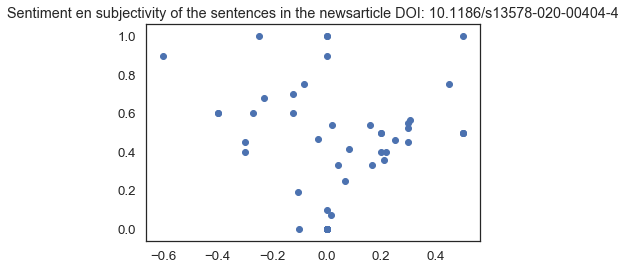

In [22]:
#get Sentiment en subjectivity scores of the sentences in the newsarticle

from pattern.en import sentiment
    
sentiment = [sentiment(str(s)) for s in sentences if len(s.words)>1]
print(sentiment)

x, y = zip(*sentiment)
plt.scatter(x, y)
plt.title('Sentiment en subjectivity of the sentences in the newsarticle DOI: 10.1186/s13578-020-00404-4')
plt.show()


# sentiment = Counter(sentiment)

# plt.figure(figsize=(15,5))
# plt.title('concepts appearance tweets')
# plt.bar(sentiment.keys(), sentiment.values(), width=.5, color='g')

[[ 0.02777778  0.94166667]
 [-0.00754419  0.03816774]
 [ 0.24350442  0.47936111]
 [-0.30575758  0.61451178]]
[1 2 2 1 3 2 1 3 2 2 3 2 0 2 2 2 2 1 2 1 2 3 0 1 0 1 3 1 1 3 3 1 2 0 1 2 3
 2 2 0 2 1 3 2 1 1 2 1 2 0 1]


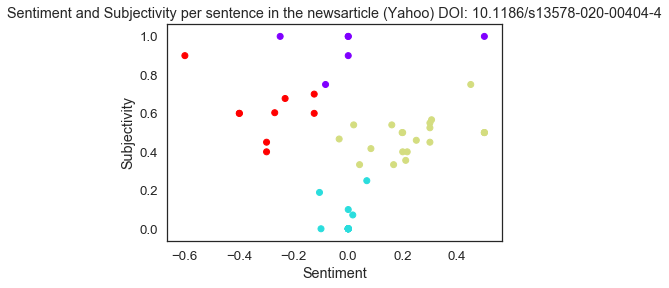

In [23]:
#K-MEANS over the senitment/subjectivity of the sentences in the newsarticle

x, y = zip(*sentiment)
# plt.scatter(x, y)
# plt.show()

X = np.array(sentiment)

# plt.scatter(X[:,0],X[:,1], label='True Position')

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.title('Sentiment and Subjectivity per sentence in the newsarticle (Yahoo) DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.savefig('sent sub 76042 news')


[[ 0.37535506  0.74316173]
 [ 0.02006373  0.03450545]
 [-0.02166008  0.47612305]
 [ 0.92208776  0.43713597]]
[0 2 1 ... 2 0 0]


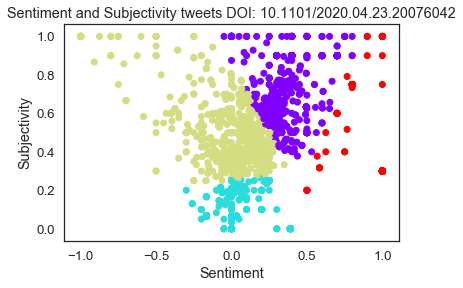

In [28]:
#Sentiment / subjectivity for TWEETS

sentiment_T = [sentiment(str(s)) for s in tweets_sentences if len(s.words)>1]
# print(sentiment_T)
x_T, y_T = zip(*sentiment_T)
# plt.scatter(x_T, y_T)
# plt.show()

X_T = np.array(sentiment_T)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_T)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.title('Sentiment and Subjectivity tweets DOI: 10.1101/2020.04.23.20076042')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')

plt.scatter(X_T[:,0],X_T[:,1], c=kmeans.labels_, cmap='rainbow')
plt.savefig('76042 sent sub tweets')
plt.show()

In [25]:
len(sentiment)

51

TWEETS with negative modality:
-0.375 Did Noakes tell Malhotra that anything with an OR less than to is not important ?
-0.15 Would be helpful to know more about those admitted to understand which children might be at risk.
-0.16666666666666666 Interesting stats and nice graphics, wonder how it would compare with US data?
-0.25 Could NY Langone generate something like this too, I wonder?
-0.15 Would be helpful to know more about those admitted to understand which children might be at risk.
-0.5 Genetic, occupational, cultural, environment etc No doubt it’s not simple.
-0.15 Would be helpful to know more about those admitted to understand which children might be at risk.
-0.25 And I don't think it's wise to downplay the severity of COVID-19.
-0.5 How would you achieve this?
-0.16666666666666666 But maybe you could close down borders at state or even county level.
-0.5 Put another way, you would first stop all travel into and out of your county, then turn it into a green zone without the

-0.375 Not sure what you mean by 'nailed'.
-0.05 twitter.com/LesterPulsford…




  " well before the Johnson panic measures of March 23rd could have had any effect."
-0.05 Could be 18 years.
-0.375 pic.twitter.com/SZKaTO4Lge




  They published this, but I'm not sure if they have up to date figures.
-0.25 Ok, so, when you are admitted to hospital with #COVID19 in the UK, you have a 1-in-3 chance of dying, a 50% chance of survival, and a 17% probability of survival with lifechanging damage to kidneys/lungs/circulatory system etc.
-0.25 Good luck učitelé.
-0.08333333333333333 twitter.com/COVID19actuary…




  肥満の定義が記載されておらず、本文中にas recognised by clinical staffとある点がやや難か？
イギリス人が考える一般的肥満が良く分かりません。
Features of 16,749 hospitalised UK patients with COVID-19 using the ISARIC WHO Clinical Characterisation Protocol
medrxiv.org/content/10.110…




  You would do better to understand this data before posting it thinking that it supports your argument.
-0.5 I would take what he says with a giant pin

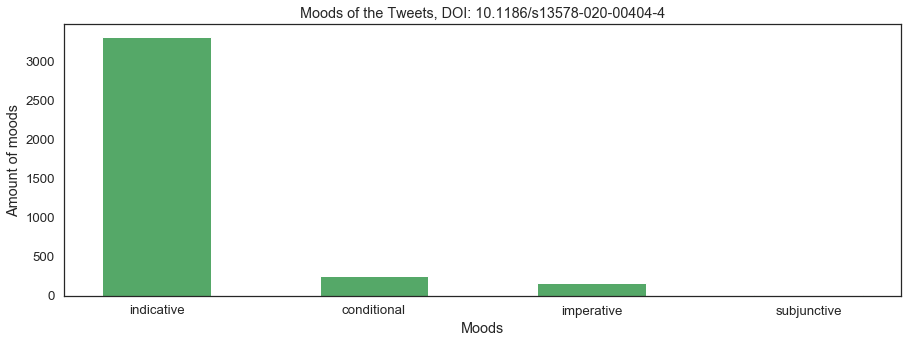

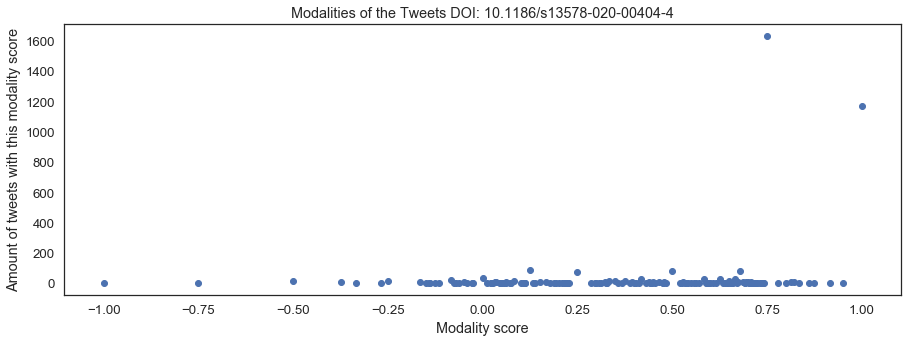

In [26]:
#mood FOR TWEETS
from pattern.en import sentiment

moods_T = [mood(str(s)) for s in tweets_sentences if len(tweets_sentences)>1]
moods_T = Counter(moods_T)

plt.figure(figsize=(15,5))
plt.title('Moods of the Tweets, DOI: 10.1186/s13578-020-00404-4')
plt.ylabel('Amount of moods')
plt.xlabel('Moods')
plt.bar(moods_T.keys(), moods_T.values(), width=.5, color='g')



#MODALITY of the sentences in the newsarticle
from pattern.en import modality
modalities_T = [modality(str(s)) for s in tweets_sentences if len(s.words)>1]

modalities_T = Counter(modalities_T)

plt.figure(figsize=(15,5))
plt.title('Modalities of the Tweets DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Modality score')
plt.ylabel('Amount of tweets with this modality score')
# plt.bar(modalities.keys(), modalities.values(), width=.5, color='g')
plt.scatter(modalities_T.keys(), modalities_T.values())
plt.show

#print negative so possibole not true:
print('TWEETS with negative modality:')
for s in tweets_sentences:
    if len(s.words)>1:
        if modality(str(s)) < 0.0:
            print(modality(str(s)), s)



In [ ]:
print(len(tweets_sentences))

In [ ]:
# load Dimensions data

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = []
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [ ]:
df_article = pd.DataFrame.from_dict({
    "doi":[r["doi"] for r in all_dimensions],
    "concepts":[r["concepts"] for r in all_dimensions],
    "year":[r["year"] for r in all_dimensions],
})


df_article = df_article[df_article.year >= 2020.0]

df_article.dropna()

In [ ]:
#DOI pakken

concepts = []
length = df_article.shape[0]

for i in range(48885):
    for element in df_article.doi[i-1:i]:
        if doi in str(element):
            for entry in df_article.concepts[i-1:i]:
                #print(df_article.concepts[i-1:i])
                concepts.append(entry)
                    
print(len(concepts))
print(concepts)

pd.DataFrame.from_dict(concepts)

In [ ]:
total_number_of_files = len(final_article)
counter = 1
for i in range(1):
    word_list= re.sub("[^\w]", " ",  final_article).split()
    word_count_dict = create_word_count_dict(word_list)
    word_probability_dict = create_word_prob_dict(word_count_dict)
#     print("Word probability dict created for text #" + str(counter))
#     print(word_probability_dict)
    counter += 1

In [ ]:
ten_percent = len(word_probability_dict)/10
ten_percent = round(ten_percent)
print(ten_percent)

print(word_probability_dict[ten_percent:])

In [ ]:
#comparing word prob. news article with concepts
doubles_freq = []

x = word_probability_dict
y = concepts[0]

concepts_y = []
for m in y:
    m_list = re.sub("[^\w]", " ",  m).split()
    concepts_y.extend(m_list)

counter = 0
for k in x:
    for m in concepts_y:
        if k[0] == m:
            counter += 1
            doubles_freq.append(m)
#             print(m)

length = len(concepts)
percentage = length/counter
# print(percentage)


counted = Counter(doubles_freq)
# print(y)
# print(counted)


plt.figure(figsize=(15,5))
plt.title('Concepts appearance in most frequent words in newsarticles (Yahoo) DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Concepts')
plt.ylabel('Amount of appearance Concepts')
plt.bar(counted.keys(), counted.values(), width=.5, color='g')

percentage_concepts_freq = 100 * (float(counter) / float(len(x)))
percent = round(percentage_concepts_freq, 2)
print(percent, "% of the most frequent words = concepts")

In [ ]:
#POS-tagging

text = word_tokenize(final_article)
tagged = nltk.pos_tag(text)
nouns = []
for item in tagged:
    if item[1][0] == 'N':
      nouns.append(item[0])
    
print(nouns)

In [ ]:
print(len(concepts_y))
doubles_POS = []
counts = 0
for k in nouns:
    for m in concepts_y:
        if k == m:
            counts += 1
            doubles_POS.append(m)
#             print(m)
            
            
length = len(concepts)
percentage = length/counts
# print(percentage)


counteren = Counter(doubles_POS)
print(counteren)

plt.figure(figsize=(15,5))
plt.title('Concepts appearance in POS-nouns newsarticle (Yahoo) DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Concepts')
plt.ylabel('Amount of appearance Concepts')
plt.bar(counteren.keys(), counteren.values(), width=.5, color='g')

percentage_concepts_pos = 100 * (float(counts) / float(len(nouns)))
percent_pos = round(percentage_concepts_pos, 2)
print(percent_pos, "% of the POS nouns = concepts")

In [ ]:
doubles_tweets = []
counts = 0
for k in word_list_tweet:
    for m in concepts_y:
        if k == m:
            counts += 1
            print(m)
            doubles_tweets.append(m)

In [18]:
recounted = Counter(doubles_tweets)
recounted

NameError: name 'doubles_tweets' is not defined

In [19]:
percentage_concepts_t = 100 * (float(counts) / float(len(word_list_tweet)))
percent_t = round(percentage_concepts_t, 2)

plt.figure(figsize=(15,5))
plt.title('Concepts appearance in tweets DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Concepts')
plt.ylabel('Amount of appearance Concepts')
plt.bar(recounted.keys(), recounted.values(), width=.5, color='g')
print(percent_t, "% of the words in the tweets = concepts")

NameError: name 'counts' is not defined